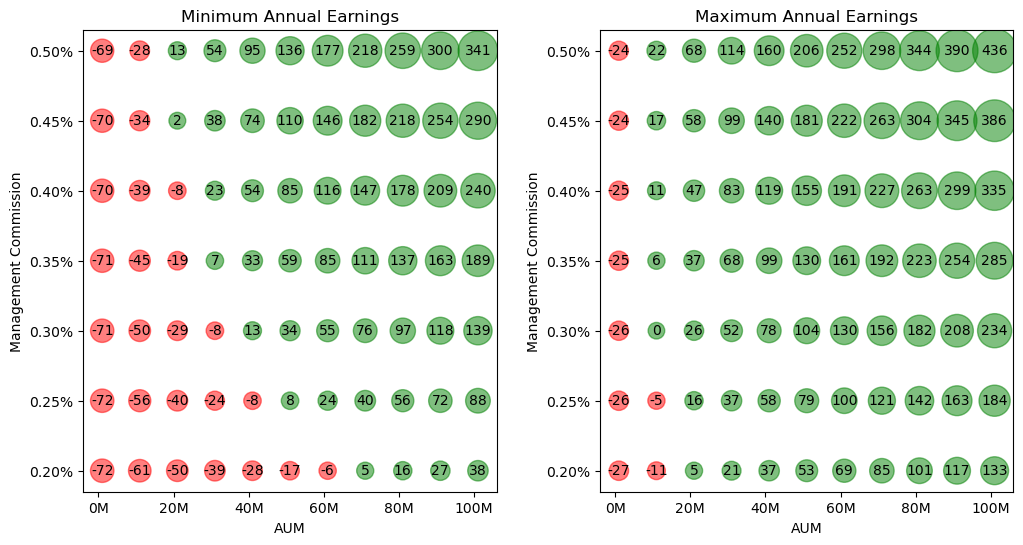

In [4]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

AUM_RANGE = range(1000000, 110000001, 10000000)
MANAGEMENT_COMMISSION_RANGE = [x / 10000 for x in range(20, 51, 5)]

# Fixed costs
ADVERTISING_COSTS = np.array([6000, 24000]) # SGF 2021 was of 21k
AUDIT_COSTS = np.array([1500, 12000])  # SGF PPR Poupança Dinâmica 2021 was of 1.5k (or 18k across 11 products)
BANKING_COSTS = np.array([0.0004, 0.0009]) # SGF's PPRs average 0.0009 with a standard deviation of 0.0012, but this variation is mostly caused by outliers of 0.003 and around. Most costs were of 0.0004 or below.
BANKING_COSTS_MAX = 2400 # Across 11 products and 2 years each, SGF's PPRs had a maximum of 2.4k in banking costs twice. All other values are below 1.7k.
COMMUNICATION_COSTS = np.array([0, 8500]) # SGF 2021 was of 8.5k
INSURANCE_COSTS = np.array([13000]) # SGF 2021 was of 13k
OTHER_COSTS = np.array([8000, 16000]) # SGF 2021 was of 10.5k

df = pd.DataFrame(list(itertools.product(AUM_RANGE, MANAGEMENT_COMMISSION_RANGE, ADVERTISING_COSTS, AUDIT_COSTS, BANKING_COSTS, COMMUNICATION_COSTS, INSURANCE_COSTS, OTHER_COSTS)), 
                            columns=['AUM', 'Commission Percentage', 'Advertising Costs', 'Audit Costs', 'Banking Costs', 'Communication Costs', 'Insurance Costs', 'Other Costs'])

df['Banking Costs'] = df['Banking Costs'] * df['AUM']
df.loc[df['Banking Costs'] > BANKING_COSTS_MAX, 'Banking osts'] = BANKING_COSTS_MAX

df['Revenue'] = df['AUM'] * df['Commission Percentage']
df['Total costs'] = df['Advertising Costs'] + df['Audit Costs'] + df['Banking Costs'] + df['Communication Costs'] + df['Insurance Costs'] + df['Other Costs']
df['Earnings'] = df['Revenue'] - df['Total costs']

df_min_earnings = df.groupby(['AUM', 'Commission Percentage'])['Earnings'].min().reset_index()
df_max_earnings = df.groupby(['AUM', 'Commission Percentage'])['Earnings'].max().reset_index()

min_total_costs = df['Total costs'].min()
max_total_costs = df['Total costs'].max()

norm = plt.Normalize(vmin=df['Earnings'].min(), vmax=df['Earnings'].max())

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 6))

for (ax, df, title) in [(ax1, df_min_earnings, 'Minimum Annual Earnings'), (ax2, df_max_earnings, 'Maximum Annual Earnings')]:
    ax.scatter(df['AUM'], df['Commission Percentage'], s=norm(abs(df['Earnings'])) * 1000, c=np.where(df['Earnings'] >= 0, 'green', 'red'), alpha=0.5)
    ax.set_title(title)

    for i, label in enumerate(df['Earnings']):
        ax.annotate(round(label / 1000), (df['AUM'][i], df['Commission Percentage'][i]), ha='center', va='center')

    ax.xaxis.set_major_formatter(lambda x, pos: f'{x / 1000000:,.0f}M')
    ax.yaxis.set_major_formatter(lambda x, pos: f'{x * 100:.2f}%')
    ax.yaxis.set_tick_params(which='both', labelleft=True)
    ax.set_ylabel('Management Commission')
    ax.set_xlabel('AUM')

fig.subplots_adjust(wspace=0.25)

plt.show()